## An overkill implementation of multivariate linear regression by dividing the learning process into sevel small steps.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
def initialize_parameters(m):
    """
    Argument:
    m -- number of features (dimensions)
    
    Returns:
    parameters -- dictionary containing:
                W -- weight matrix (1, m)
                b -- bias (scalar)
    """
    np.random.seed(1)
    
    W = np.random.randn(1, m) * 0.01
    b = 0
    
    parameters = {"W" : W,
                  "b" : b}
    
    return parameters

In [3]:
def forward_prop(X, parameters):
    """
    Argument:
    X -- data (number of features (m), number of examples(n))
    parameters -- W and b
    
    Returns:
    Y_hat -- current regression
    """
    W = parameters["W"]
    b = parameters["b"]
    
    Y_hat = np.dot(W, X) + b
    
    assert(Y_hat.shape == (1, X.shape[1]))
    
    return Y_hat

In [4]:
def l2_cost(Y_hat, Y):
    """
    Argument:
    Y_hat -- predict values (1, number of examples)
    Y --     true values (1, number of examples)
    
    Returns:
    l2 (MSE) cost
    """
    return np.mean((Y_hat - Y) ** 2)

In [5]:
def backward_prop(X, Y, Y_hat):
    """
    Argument:
    X -- data (number of features (m), number of examples(n))
    Y -- true values (1, number of examples(n))
    Y_hat -- predict values (1, number of examples(n))
    """
    n = Y.shape[1]
    
    dW = (1 / n) * 2 * np.dot((Y_hat - Y), X.T)
    db = np.mean(2 * (Y_hat - Y), keepdims = True)
    
    assert(dW.shape == (1, X.shape[0]))
    assert(db.shape == (1, 1))
    
    return dW, db

In [6]:
def update_parameters(parameters, dW, db, learning_rate):
    """
    Argument:
    parameters -- W and b
    
    Return:
    parameters
    """
    parameters["W"] = parameters["W"] - learning_rate * dW
    parameters["b"] = parameters["b"] - learning_rate * db
    
    return parameters

In [7]:
def linear_regression_model(X, Y, learning_rate = 0.0075, num_iterations = 1000, print_cost = False):
    
    np.random.seed(1)
    (m, n) = (X.shape[0], X.shape[1])
    costs = []
    
    parameters = initialize_parameters(m)
    
    for i in range(num_iterations):
        Y_hat = forward_prop(X, parameters)
        cost = l2_cost(Y_hat, Y)
        dW, db = backward_prop(X, Y, Y_hat)
        parameters = update_parameters(parameters, dW, db, learning_rate)
        
        if print_cost and i % 10 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
            
        costs.append(cost)
    
    # plot the cost
#     plt.plot(np.squeeze(costs))
#     plt.ylabel('cost')
#     plt.xlabel('iterations')
#     plt.title("learning rate = " + str(learning_rate))
#     plt.show()
    
    return parameters

## Univariate data

In [8]:
path = '..\data\ex1data1.txt'
data = pd.read_csv(path, header=None).values
X = data[:, [0]]
Y = data[:, [1]]

parameters = linear_regression_model(X.T, Y.T, learning_rate = 0.0075, num_iterations = 1500, print_cost = False)

## Compare with Scikit-learn implementation

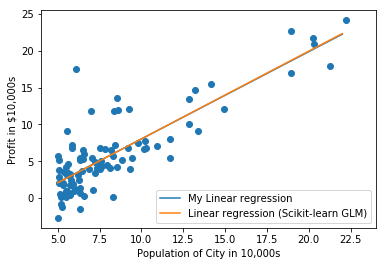

In [9]:
xx = np.arange(5, 23)
yy = parameters["W"] * xx + parameters["b"]

plt.scatter(X, Y)
plt.plot(xx, yy.T, label='My Linear regression')

# Compare with Scikit-learn Linear regression 
regr = LinearRegression()
regr.fit(X, Y)
plt.plot(xx, (regr.intercept_+regr.coef_*xx).T, label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

## Multivariate data

In [10]:
path = '..\data\ex1data2.txt'
data = pd.read_csv(path, header=None).values
X = data[:, 0:-1]
Y = data[:, [-1]]
X = (X - np.mean(X)) / np.std(X)

parameters = linear_regression_model(X.T, Y.T, learning_rate = 0.0075, num_iterations = 1000, print_cost = False)

In [11]:
regr = LinearRegression()
regr.fit(X, Y)
print("my weights = " + str(parameters["W"]))
print("sklearn weights = " + str(regr.coef_))

my weights = [[ 153649.26395906 -102174.44153009]]
sklearn weights = [[  159125.15353818 -9988017.38933275]]
